## **Regularization**

Limiting the $w$ vector to avoid overfitting.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate Linear Data
np.random.seed(0)
x = np.linspace(0,10,100)  ## predictor
y = 1 + 2*x + np.random.normal(0,1,100) ## target

## Anomalies
outlier_indices = np.where(x > 8)[0]
num_outliers = 5 ## 5 outliers
outlier_indices = np.random.choice(outlier_indices, num_outliers, replace=False)
y[outlier_indices] =y[outlier_indices] + 20

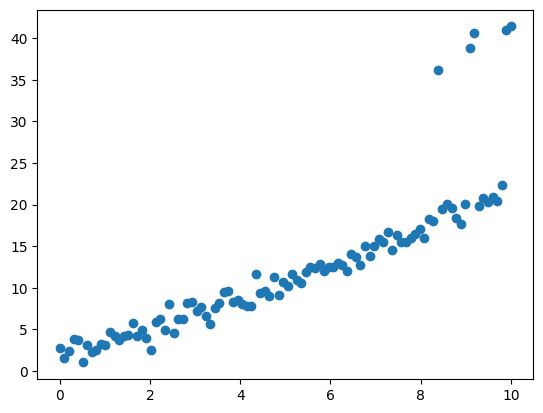

In [14]:
plt.scatter(x,y)

In [17]:
## Create a Regression Object Class
class LinearReg:
  def __init__(self, X = None, y = None):
    self.X = X
    self.y = y

  def fit(self, X, y):
    X = np.column_stack((np.ones(X.shape[0]), X))
    self.coef_ = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return self.coef_

  def predict(self, X):
    return np.dot(np.column_stack((np.ones(X.shape[0]), X)), self.coef_)

  def cost(self, X, y):


In [20]:
## make an instance
reg1 = LinearReg()

## fit
reg1.fit(x,y)

## predict x
y_pred = reg1.predict(x)
y_pred

array([-0.32816222, -0.07790019,  0.17236183,  0.42262386,  0.67288588,
        0.92314791,  1.17340993,  1.42367196,  1.67393398,  1.92419601,
        2.17445803,  2.42472006,  2.67498208,  2.92524411,  3.17550613,
        3.42576816,  3.67603018,  3.92629221,  4.17655423,  4.42681626,
        4.67707828,  4.92734031,  5.17760233,  5.42786436,  5.67812638,
        5.92838841,  6.17865043,  6.42891246,  6.67917448,  6.92943651,
        7.17969853,  7.42996056,  7.68022258,  7.93048461,  8.18074663,
        8.43100865,  8.68127068,  8.9315327 ,  9.18179473,  9.43205675,
        9.68231878,  9.9325808 , 10.18284283, 10.43310485, 10.68336688,
       10.9336289 , 11.18389093, 11.43415295, 11.68441498, 11.934677  ,
       12.18493903, 12.43520105, 12.68546308, 12.9357251 , 13.18598713,
       13.43624915, 13.68651118, 13.9367732 , 14.18703523, 14.43729725,
       14.68755928, 14.9378213 , 15.18808333, 15.43834535, 15.68860738,
       15.9388694 , 16.18913143, 16.43939345, 16.68965548, 16.93

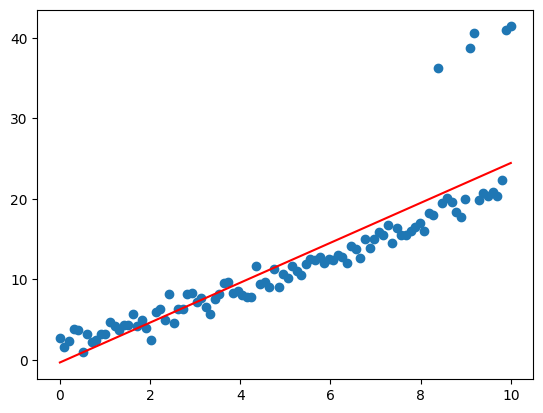

In [22]:
plt.scatter(x,y) ## scatter plot
plt.plot(x,y_pred, color = "red") ## line with the predictions

In [23]:
## Cost Function of Regression
## np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) directly optimizes SSE
## gradient: X'(y-Xw)
## The regression has the following optimization problem
## Min J(w) by finding the optimal w
## Linear does NOT do regularization
## are there models for linear regression that are REGULARIZED?

## **Ridge Regression**

This adds an L2 norm penalty to the cost function. The cost function will be:


$$SSE + alpha*||w||_2 $$

So alpha controls the amount of penalty. If alpha = 0, I am back to regular regression (no penalty)

In [28]:
## cost function
coef = reg1.coef_
penalty = np.linalg.norm(coef)**2
SSE = np.sum((y-y_pred)**2)
Ridge_Cost = SSE + penalty

In [29]:
Ridge_Cost

1794.4241952006928

In [30]:
SSE

1788.1780325031714

In [33]:
from sklearn.linear_model import Ridge

## Needs to be regularized
## instance
model2 = Ridge(alpha = 1)

## fit
model2.fit(x.reshape(-1, 1), y)

Ridge(alpha=1)

In [37]:
## coefficients are PENALIZED (the more different than zero, the more penalty)
model2.coef_  ## this gives the slopes only
## alpha just penalizes the slopes

array([2.47468323])

In [38]:
model2.intercept_

-0.31360813790998066

In [39]:
from sklearn.linear_model import RidgeCV

## Needs to be regularized
## instance
model3 = RidgeCV(alphas = [0.01, 0.1, 1, 10, 100])

## fit
model3.fit(x.reshape(-1, 1), y)

RidgeCV(alphas=[0.01, 0.1, 1, 10, 100])

In [40]:
model3.alpha_

1.0

In [41]:
## by default, LogisticRegression regularizes
from sklearn.linear_model import LogisticRegression

## **Lasso Regularization**

Uses the L1 norm as opposed the L2 norm.


$$SSE + alpha*||w||_1$$

It makes the weights be exactly zero, but too computationally expensive.

In [43]:
from sklearn.linear_model import Lasso


## instance
model3 = Lasso(alpha = 2)

## fit
model3.fit(x.reshape(-1, 1), y)

Lasso(alpha=2)

In [44]:
model3.coef_

array([2.24234652])

In [45]:
## Use CV to select alpha

from sklearn.linear_model import LassoCV

## instance
model3 = LassoCV(alphas = [0.01, 0.1, 1, 10, 100])

## fit
model3.fit(x.reshape(-1, 1), y)

LassoCV(alphas=[0.01, 0.1, 1, 10, 100])

In [46]:
model3.alpha_

0.01

In [47]:
from sklearn.linear_model import ElasticNet

## only for LINEAR REGRESSION
model4 = ElasticNet(alpha = 1, l1_ratio = 0.5)

## fit
model4.fit(x.reshape(-1, 1), y)

ElasticNet(alpha=1)

In [48]:
## Huber Regression is optimal for a few outliers

from sklearn.linear_model import HuberRegressor

## instance
model5 = HuberRegressor(epsilon = 1.35)

## fit
model5.fit(x.reshape(-1, 1), y)

HuberRegressor()